In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.11.01']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
981,Afghanistan,22.11.01,203167
1974,Africa,22.11.01,12386142
2955,Albania,22.11.01,332969
3936,Algeria,22.11.01,270839
4911,Andorra,22.11.01,46535
...,...,...,...
228000,Wallis and Futuna,22.11.01,3415
229016,World,22.11.01,630825034
229952,Yemen,22.11.01,11939
230911,Zambia,22.11.01,333681


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
981,Afghanistan,22.11.01,203167
2955,Albania,22.11.01,332969
3936,Algeria,22.11.01,270839
4911,Andorra,22.11.01,46535
5868,Angola,22.11.01,103131
...,...,...,...
226309,Vietnam,22.11.01,11503334
228000,Wallis and Futuna,22.11.01,3415
229952,Yemen,22.11.01,11939
230911,Zambia,22.11.01,333681


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
218880,United States,22.11.01,97531408
95484,India,22.11.01,44655828
73630,France,22.11.01,36875772
78507,Germany,22.11.01,35649648
29272,Brazil,22.11.01,34837035
194222,South Korea,22.11.01,25670407
217865,United Kingdom,22.11.01,23898489
103353,Italy,22.11.01,23531023
105334,Japan,22.11.01,22389872
172002,Russia,22.11.01,21129849


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
211863,Turkey,22.11.01,16919638
196173,Spain,22.11.01,13511768
157564,Oceania,22.11.01,12624418
226309,Vietnam,22.11.01,11503334
12810,Australia,22.11.01,10381125
...,...,...,...
123950,Macao,22.11.01,795
97458,International,22.11.01,721
224332,Vatican,22.11.01,29
213920,Tuvalu,22.11.01,23


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.11.01', df_etc['확진자'].sum()]

C:\Users\user\AppData\Local\Temp\ipykernel_13544\1185635926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc['ETC'] = ['22.11.01', df_etc['확진자'].sum()]


In [8]:
df_top

,일자,확진자
국가,,
United States,22.11.01,97531408
India,22.11.01,44655828
France,22.11.01,36875772
Germany,22.11.01,35649648
Brazil,22.11.01,34837035
South Korea,22.11.01,25670407
United Kingdom,22.11.01,23898489
Italy,22.11.01,23531023
Japan,22.11.01,22389872


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.11.01,97531408
1,India,22.11.01,44655828
2,France,22.11.01,36875772
3,Germany,22.11.01,35649648
4,Brazil,22.11.01,34837035
5,South Korea,22.11.01,25670407
6,United Kingdom,22.11.01,23898489
7,Italy,22.11.01,23531023
8,Japan,22.11.01,22389872
9,Russia,22.11.01,21129849


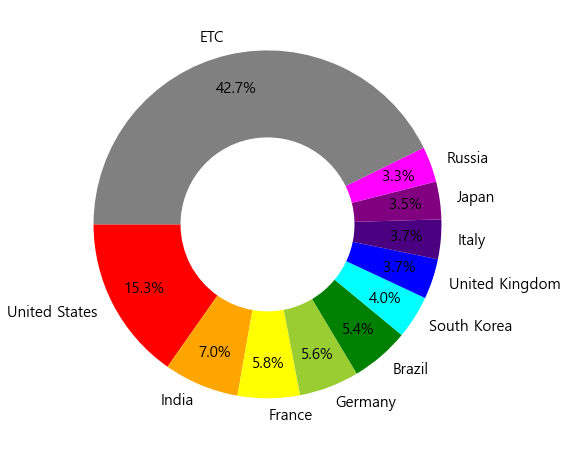

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()